# <CENTER> DOMACI ZADATAK 1 </CENTER> 

## Učitavanje i podela podataka 

Podaci se nalaze u .csv dokumentu i sadrze 341 merenja, pet prediktora i ciljnu promenljivu. Prvi korak jeste izdvajanje kolona predikotora kao $X$ matricu i kolonu ciljne promenljive kao $y$ kolona vektor. Zatim se ubacuje kolona jedinica, a potom se podaci dele na trenirajući i testirajući skup, a trenirajuci skup na novi trenirajuci i validacioni skup. Trenirajuci skup ce sadrzati 20% ukuponog broja merenja, dok ce od preostalih 80% merenja, trenirajuci skup imati 70% merenja. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Ucitavanje skupa podataka
data = pd.read_csv('data.csv',header = None)

# Podela na X i y(ciljna promenjljiva)
X = data.iloc[:,0:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()    

data.head()

,0,1,2,3,4,5
0,0.036907,-0.023584,-0.039493,-0.025952,-0.038357,90.0
1,-0.008362,0.008063,-0.076395,-0.080237,-0.017646,39.0
2,-0.012673,-0.000193,-0.002592,-0.027129,-0.050783,160.0
3,-0.018062,-0.019456,0.034309,0.067317,-0.017646,101.0
4,0.081097,0.043837,0.071210,0.032433,0.048628,180.0


In [3]:
# Dodavanje kolone jedinica matrici X
m, n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1)

pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.0,0.036907,-0.023584,-0.039493,-0.025952,-0.038357
1,1.0,-0.008362,0.008063,-0.076395,-0.080237,-0.017646
2,1.0,-0.012673,-0.000193,-0.002592,-0.027129,-0.050783
3,1.0,-0.018062,-0.019456,0.034309,0.067317,-0.017646
4,1.0,0.081097,0.043837,0.071210,0.032433,0.048628


Funkcija $SplitData(X, y, p)$ uvezena je iz skripte $ LinearRegression$. Ulazni parametri su:
* X - matrica koja sadrzi sva merenja za pet prediktora i pocetnu kolonu jedinica
* y - kolona svih merenja za ciljnu promenljivu
* p - procenat merenja koji ce test skup imati
Ova funkcija prvo permutuje merenja, zatim prvih ptest procenata od ukupnog broja merenja uzima za test skup, a preostala merenja uzima kao trenirajuci skup. Povratne vrednosti su trenirajuci i testirajuci skup za X i y ulazne promenljive u sledecem redosledu:
### <center>$X$<sub>$train$</sub>$, X$<sub>$test$</sub>$, y$<sub>$train$</sub>$, y$<sub>$test$</sub>$ = SplitData(X, y, p)$ </center>


In [4]:
from LinearRegression import split_data as SplitData

# Podela na trenirajuci i testirajuci skup, pri cemu je ptest procenat podataka koje zauzima test skup
X_train, X_test, y_train, y_test = SplitData(X, y, p = 20)

# Jos jedna podela trenirajuceg na novi trenirajuci i validacioni skup
X_train, X_val, y_train, y_val = SplitData(X_train, y_train, p = 30)

print('Broj podataka u trenirajucem skupu: ', X_train.shape[0])
print('Broj podataka u testirajucem skupu: ', X_test.shape[0])
print('Broj podataka u validacionom skupu: ', X_val.shape[0])

Broj podataka u trenirajucem skupu:  191
Broj podataka u testirajucem skupu:  68
Broj podataka u validacionom skupu:  81


## Linearna Regresija

Trazenje minimuma kriterijumske funkcije $J(\theta)$ tako sto se gradijent po svim prediktorima izjednaci sa nulom. Odatle se dobija optimalan vektor $\theta$<sub>$n x 1$</sub>  sa vrednostima $\theta$<sub>$0$</sub>$,...,$$\theta$<sub>$n$</sub>, pri cemu je $n$ broj obelezja. Optimalno resenje linearne regresije se moze pronaci analiticki:
### <center> $\theta$ $= (X$<sub>$train$</sub><sup>$T$</sup>$X$<sub>$train$</sub>$)$<sup>$-1$</sup>$X$<sub>$train$</sub><sup>$T$</sup>$y$<sub>$train$</sub> </center>
Funkcija $fit(X$<sub>$train$</sub>$, y$<sub>$train$</sub>$)$ uvezena iz skripte racuna ovo optimalno $\theta$ na analiticki nacin i cuva ove vrednosti u vidu vektora $\theta$<sub>$n x 1$</sub> kao novi argument klase. Metoda klase $predict(X$<sub>$test$</sub>$)$ uzima argument $\theta$, izracunat u prethodnom koraku, i dobija se predikcija za merenja iz test skupa. Validacioni skup se ne koristi kod obicne linearne regersije jer ne postoji validacije.
### <center> $\hat{y}$ = $X$<sub>$test$</sub> $\theta$ </center>

In [5]:
from LinearRegression import Linear_Regression

# Pravi se objekat klase Linear_Regression, racunaju vrednosti teta i radi predikcija nad test skupom
model = Linear_Regression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Optimalno teta 
opt_theta = model.get_theta()
print('Optimalno teta je:', opt_theta)

Optimalno teta je: [152.71455099 631.55340758 -85.52641011  85.25469494 590.07135231
 133.1403286 ]


## Polinomijalna Linearna Regresija

Kod polinomijalne regresije postoji razlika samo kod hipoteze i broja prediktora. Broj prediktora se vestacki povecava tako sto se kombinuju postojeci prediktori, kojih u ovom slucaju ima pet. Ukoliko je stepen polinomijalne funkcije dva, broj prediktora ce vec tad biti dvadeset.
Neka su postojeci pet prediktora oznaceni kao $x$<sub>$1$</sub>$, x$<sub>$2$</sub>$,...,$ $x$<sub>$5$</sub>. Tada su novi prediktori kada je stepen polinomijalne funkcije dva:   
#### <center>$x$<sub>$1$</sub><sup>$2$</sup>, $x$<sub>$1$</sub>$x$<sub>$2$</sub>$, ... ,x$<sub>$1$</sub>$x$<sub>$5$</sub>, $x$<sub>$2$</sub><sup>$2$</sup>, $x$<sub>$2$</sub>$x$<sub>$3$</sub>$, ... ,x$<sub>$2$</sub>$x$<sub>$5$</sub>, $x$<sub>$3$</sub><sup>$2$</sup>, $x$<sub>$3$</sub>$x$<sub>$4$</sub>, $x$<sub>$3$</sub>$x$<sub>$5$</sub>, $x$<sub>$4$</sub>$x$<sub>$5$</sub>, $x$<sub>$5$</sub><sup>$2$</sup> </center> 
Kada se napravi matrica sa dodatnim kolonama tj. novim prediktorima, mogu da se ponove isti koraci kao kod obicne linearne regresije, s tim sto se pravi novi objekat klase $Polynomial$ izvedene iz $LinearRegression$ klase.

In [6]:
from LinearRegression import Polynomial

# Pravi se objekat klase Polynomial i matrice sa novim kolonama tj. prediktorima
model_poly = Polynomial()
X_train_new = model_poly.make_poly(X_train, degree = 2)
X_test_new = model_poly.make_poly(X_test, degree = 2)

# Racuna se optimalno teta i radi predikcija 
model_poly.fit(X_train_new, y_train)
pred_poly = model_poly.predict(X_test_new)

# Optimalno teta 
opt_theta = model_poly.get_theta()
print('Optimalno teta je:', opt_theta)

# Izgled nove tabele nakon dodavanja prediktora za trenirajuci skup
X_train_new_df = pd.DataFrame(X_train_new)
X_train_new_df.head()

Optimalno teta je: [  153.61573103   544.95640986   -88.30013767    63.21780164
   688.78318945    82.59050149  -175.07727218 -4727.48317233
  -971.02560354  3342.64728565  3581.28713112 -1960.58278984
  -116.127056    6845.00137857  2340.86819362 -1215.53859712
   269.89742538  3209.23590207 -3489.68452643 -4734.59454731
  1484.49194414]


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.004572,-0.011201,0.034309,0.016305,-0.001078,0.000021,-0.000051,0.000157,0.000075,...,1.254541e-04,-0.000384,-0.000183,0.000012,0.001177,0.000559,-0.000037,0.000266,-0.000018,0.000001
1,1.0,-0.065486,-0.007073,-0.039493,-0.003304,0.007207,0.004288,0.000463,0.002586,0.000216,...,5.002409e-05,0.000279,0.000023,-0.000051,0.001560,0.000130,-0.000285,0.000011,-0.000024,0.000052
2,1.0,-0.030996,0.008063,-0.002592,0.009436,0.011349,0.000961,-0.000250,0.000080,-0.000292,...,6.500730e-05,-0.000021,0.000076,0.000092,0.000007,-0.000024,-0.000029,0.000089,0.000107,0.000129
3,1.0,-0.029918,-0.000193,-0.050564,-0.038459,0.007207,0.000895,0.000006,0.001513,0.001151,...,3.725169e-08,0.000010,0.000007,-0.000001,0.002557,0.001945,-0.000364,0.001479,-0.000277,0.000052
4,1.0,0.025051,0.020446,-0.039493,-0.041180,0.007207,0.000628,0.000512,-0.000989,-0.001032,...,4.180506e-04,-0.000807,-0.000842,0.000147,0.001560,0.001626,-0.000285,0.001696,-0.000297,0.000052


In [7]:
# Provere radi, mogu se uporediti tebele trenirajuceg skupa pre i posle dodavanja novih obelezja
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5
0,1.0,0.004572,-0.011201,0.034309,0.016305,-0.001078
1,1.0,-0.065486,-0.007073,-0.039493,-0.003304,0.007207
2,1.0,-0.030996,0.008063,-0.002592,0.009436,0.011349
3,1.0,-0.029918,-0.000193,-0.050564,-0.038459,0.007207
4,1.0,0.025051,0.020446,-0.039493,-0.041180,0.007207


Koji stepen polinomijalne funkcije daje najbolje rezultate moze se videti na validacionoj krivi. Uporedjivanjem trenirajuce i validacione krive mozemo da uocimo za koji stepen dolazi do preobucavanja. Koristeci hold-out validaciju za nekoliko razlicitih vrednosti stepena polinomijalne funkcije.

Najbolji stepen je:  1


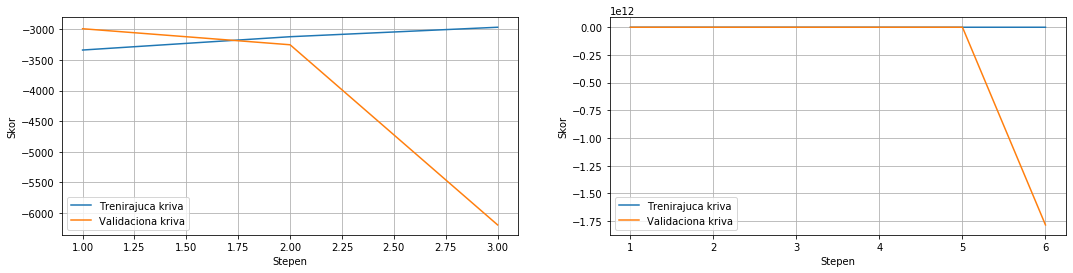

In [8]:
from LinearRegression import MSE_metric 

# Pravi se objekat klase Polynomial i definise niz vrednosti koje stepen uzima
model_poly = Polynomial()
degrees = np.arange(1,10)

score_train = []
score_val = []

for degree in degrees:
    X_new_train = model_poly.make_poly(X_train, degree)
    X_new_val = model_poly.make_poly(X_val, degree)
    
    model_poly.fit(X_new_train, y_train)
    
    pred_train = model_poly.predict(X_new_train)
    score_train.append(-MSE_metric(pred_train, y_train))
    
    pred_val = model_poly.predict(X_new_val)
    score_val.append(-MSE_metric(pred_val, y_val))

# Naci stepen za koje je validaciona kriva maksimalna
max_val = max(score_val)
best_degree =  score_val.index(max_val)
print('Najbolji stepen je: ', degrees[best_degree])

# Plotovanje trenirajuce i validacione krive
plt.figure()
%matplotlib inline

plt.subplots(figsize=(18,4 ))
plt.subplot(1,2,1)
plt.plot(degrees[0:3], score_train[0:3])
plt.plot(degrees[0:3], score_val[0:3])
plt.xlabel('Stepen')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

plt.subplot(1,2,2)
plt.plot(degrees[0:6], score_train[0:6])
plt.plot(degrees[0:6], score_val[0:6])
plt.xlabel('Stepen')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

# Ridge Regresija

Obzirom da se sa povecanjem broja prediktora raste i verovatnoca da ce doci do preobucavanja, kao zastita od ove pojave uvodi se regularizacioni deo unutar kriterijumske funkcije. Parametar $\lambda$ jeste regularizacioni faktor koji utice na to koliko ce se suzbiti preobucavanje. Kada je $\lambda$ jednako nuli tada ne postoji regularizacija, a kada je vrednost ovog parametra veca onda je i regularizacija jaca. Kod Ridge regresije ovaj regularizacioni clan je suma kvadrata svih vrednosti $\theta$ osim prvog, odnosno nultog.

### <center> $J(\theta) = \frac{1}{m} \sum_{i=1}^m (y$<sup>$(i)$</sup>$ - h(x$<sup>(i)</sup>$))$<sup>$2$</sup>$ + \frac{\lambda}{m} \sum_{j=1}^n \theta $<sub>$j$</sub><sup>$2$</sup> </center> 

Obzirom da je ova kriterijumska funkcija diferencijabilna po parametru $\theta$, optimalno $\theta$<sup>*</sup> se moze zapisati u analitickom obliku kao u jednacini ispod. Nakon odredjivanja optimalnog teta moze da se uraditi predikcija na isti nacin kao sto je uradjeno kod prethodnih linearnih regresija.

###  <center> $\theta$<sup>*</sup> $= (X$<sup>$T$</sup>$X + \lambda I)$<sup>$-1$</sup>$X$<sup>$T$</sup>$y$ </center>



In [9]:
from LinearRegression import Ridge

# Pravi se objekat klase Ridge, racunaju vrednosti teta i radi predikcija nad test skupom
model_ridge = Ridge()
model_ridge.fit(X_train, y_train, lam = 0.3)
pred_ridge = model_ridge.predict(X_test)

# Optimalno teta 
opt_theta = model.get_theta()
print('Optimalno teta je:', opt_theta)

Optimalno teta je: [152.71455099 631.55340758 -85.52641011  85.25469494 590.07135231
 133.1403286 ]


U slucaju da je bolje rezultate moguce dobiti sa vecim stepenom polinomijalne funkcije i nekom vrednoscu $\lambda$ koja moze da suzbije preobucavanje, trazice se par parametara (stepen, $\lambda$) koji ce dati najbolje rezultate. U slucaju da je vec izabrana vrednost stepena 2, jer se pocevsi od tog trenutka primecuje preobucavanje, potrebno je odrediti srednju kvadratnu gresku ili skor za nekoliko razlicitih vrednosti $\lambda$.

Najbolje lambda je:  0.01


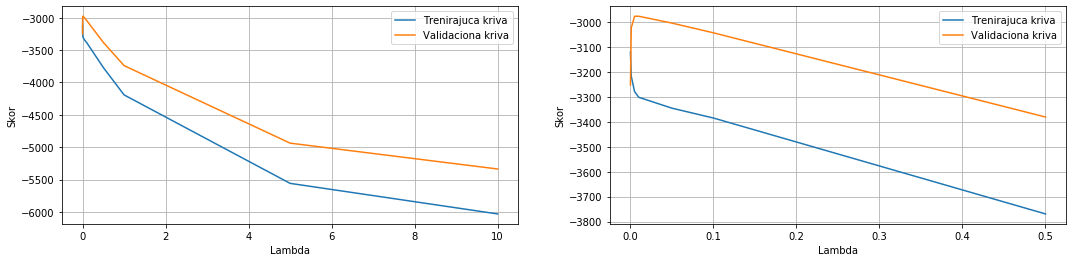

In [10]:
# Pravi se objekat klase Ridge
model_ridge = Ridge()

# Formiraju se nove matrice za izabrani stepen polinoma
X_new_train = model_poly.make_poly(X_train, degree = 2)
X_new_val = model_poly.make_poly(X_val, degree = 2)

# Lista vrednosti lambda
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

# Prazne liste za skladistenje skorova
score_train = []
score_val = []

for l in lambdas:
    model_ridge.fit(X_new_train, y_train, lam = l)
    
    pred_train = model_ridge.predict(X_new_train)
    score_train.append(-MSE_metric(pred_train, y_train))
    
    pred_val = model_ridge.predict(X_new_val)
    score_val.append(-MSE_metric(pred_val, y_val))
    

# Naci stepen za koje je validaciona kriva maksimalna
max_val = max(score_val)
best_lambda =  score_val.index(max_val)
print('Najbolje lambda je: ', lambdas[best_lambda])

# Plotovanje trenirajuce i validacione krive
plt.figure()
%matplotlib inline

plt.subplots(figsize=(18,4 ))
plt.subplot(1,2,1)
plt.plot(lambdas, score_train)
plt.plot(lambdas, score_val)
plt.xlabel('Lambda')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

plt.subplot(1,2,2)
plt.plot(lambdas[0:7], score_train[0:7])
plt.plot(lambdas[0:7], score_val[0:7])
plt.xlabel('Lambda')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

Vrednosti ova dva parametra za koje je skor najveci se takodje moze naci tako sto se skor racuna za sve varijante ova ih parametara. 

In [11]:
# Pravi se objekat klase Ridge
model_ridge = Ridge()

# Liste vrednosti za stepen i lambdu
degrees = np.arange(1,10)
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
pairs = []
score_val = []

for deg in degrees:
    X_new_train = model_poly.make_poly(X_train, deg)
    X_new_val = model_poly.make_poly(X_val, deg)   
    
    for l in lambdas:
        model_ridge.fit(X_new_train, y_train, lam = l)
        pred_val = model_ridge.predict(X_new_val)
        score_val.append(-MSE_metric(pred_val, y_val))
        pairs.append((deg,l))

max_val = max(score_val)
best_pair_id = score_val.index(max_val)
best_pair = pairs[best_pair_id]
print('Najbolji par (stepen, lambda) je:', best_pair)

Najbolji par (stepen, lambda) je: (2, 0.01)


## LASSO Regresija

Kriterijumska funkcija ove regresije se, u odnosu na kriterijumsku funkciju Ridge regresije, razlikuje samo po regularizacionom delu koji sada predstavlja sumu apsolutnih vrednosti svih vrednosti $\theta$ osim $\theta_{0}$. Medjutim, optimalno \theta se ne moze dobiti iz analitickog oblika, vec je potrebno koristiti neku iterativnu metodu za optimizaciju. Ovde se koristi modifikacija $Powell$-e metode tj. funkcija prikazana ispod. 
##### <center> scipy.optimize.fmin_powell(func, x0, args = ()) </center> 
Parametar **func** predstavlja kriterijumsku funkciju, **x0** je inicijalan vektor sa vrednostima $\theta$ koje ce se na dalje i menjati sve dok kriterijumska funkcija ne bude zadovoljavajuca. Parametar **args** sadrzi dodatne argumente koje ce koristiti kriterijumska funkcija. Nakon pronalaska $\theta$, sledi predikcija koja se radi na isti nacin kao kod prethodnih regresija.
### <center> $J(\theta) = \frac{1}{m} \sum_{i=1}^m (y$<sup>$(i)$</sup>$ - h(x$<sup>(i)</sup>$))$<sup>$2$</sup>$ + \frac{\lambda}{m} \sum_{j=1}^n \mid \theta $<sub>$j$</sub> $\mid$ </center>

In [12]:
from LinearRegression import Lasso

# Pravi se objekat klase Linear_Regression, racunaju vrednosti teta i radi predikcija nad test skupom
model_lasso = Lasso()
model_lasso.fit(X_train, y_train, lam = 0.3)
pred_lasso = model_lasso.predict(X_test)

# Optimalno teta 
opt_theta = model.get_theta()
print('Optimalno teta je:', opt_theta)

Optimalno teta je: [152.71455099 631.55340758 -85.52641011  85.25469494 590.07135231
 133.1403286 ]


Najbolje lambda je:  5


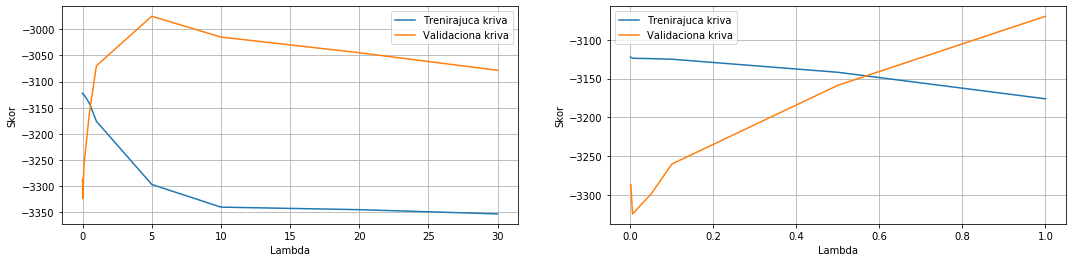

In [13]:
# Pravi se objekat klase Ridge
model_lasso = Lasso()

# Formiraju se nove matrice za izabrani stepen polinoma
X_new_train = model_poly.make_poly(X_train, degree = 2)
X_new_val = model_poly.make_poly(X_val, degree = 2)

# Lista vrednosti lambda
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30]

# Prazne liste za skladistenje skorova
score_train = []
score_val = []

for l in lambdas:
    model_lasso.fit(X_new_train, y_train, lam = l)
    
    pred_train = model_lasso.predict(X_new_train)
    score_train.append(-MSE_metric(pred_train, y_train))
    
    pred_val = model_lasso.predict(X_new_val)
    score_val.append(-MSE_metric(pred_val, y_val))
    

# Naci stepen za koje je validaciona kriva maksimalna
max_val = max(score_val)
best_lambda =  score_val.index(max_val)
print('Najbolje lambda je: ', lambdas[best_lambda])

# Plotovanje trenirajuce i validacione krive
plt.figure()
%matplotlib inline

plt.subplots(figsize=(18,4 ))
plt.subplot(1,2,1)
plt.plot(lambdas, score_train)
plt.plot(lambdas, score_val)
plt.xlabel('Lambda')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

plt.subplot(1,2,2)
plt.plot(lambdas[0:8], score_train[0:8])
plt.plot(lambdas[0:8], score_val[0:8])
plt.xlabel('Lambda')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

In [14]:
# Pravi se objekat klase Lasso
model_lasso = Lasso()

# Liste vrednosti za stepen i lambdu
degrees = np.arange(1,5)
lambdas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
pairs = []
score_val = []

for deg in degrees:
    X_new_train = model_poly.make_poly(X_train, deg)
    X_new_val = model_poly.make_poly(X_val, deg)   
    
    for l in lambdas:
        model_lasso.fit(X_new_train, y_train, lam = l)
        pred_val = model_lasso.predict(X_new_val)
        score_val.append(-MSE_metric(pred_val, y_val))
        pairs.append((deg,l))

max_val = max(score_val)
best_pair_lasso_id = score_val.index(max_val)
best_pair_lasso = pairs[best_pair_lasso_id]
print('Najbolji par (stepen, lambda) za Lasso regresiju je:', best_pair_lasso)

Najbolji par (stepen, lambda) za Lasso regresiju je: (2, 5)


## Lokalno Ponderisana Regresija

Kod prethodnih regresija, optimalno $\theta$ se nalazilo tako sto su se njegove vrednosti prilagodjavale podacima iz trening skupa, pri cemu su svi podaci imali isti znacaj tj. tezinu. Kod lokalno ponderisane linearne regresije se daju drugacije tezine podacima iz trening skupa. U zavisnosti od udaljenosti podataka trening skupa od jednog merenja iz test skupa, tezine ce biti vece ili manje. Ove tezine se koriste za fitovanje pri cemu postoje razliciti $\theta$ vektori tj. ne postoji jedan koji ce se koristiti tokom predikcije. Odgovarajuci podatak iz test skupa ce imati odgovarajuci vektor $\theta$. 

In [15]:
from LinearRegression import Locally_Weighted

# Pravi se objekat klase Locally_Weighted i racunaju se matrice za svaki test primer
model_w = Locally_Weighted()
model_w.weight_matrices(X_train, X_test, tau = 0.1)

# Obucavanje na trenirajucem skupu i predikcija za test skup
model_w.fit(X_train, y_train)
pred_w = model_w.predict(X_test)

# Optimalno teta je lista teta vektora, pri cemu je svako teta optimalno za odredjeni test primer
opt_theta = model_w.get_theta()
print('Optimalno teta je:', opt_theta[0:5])

Optimalno teta je: [array([153.05539218, 692.24728237, -41.72381562,   9.83700349,
       586.36204833, 100.62062672]), array([151.4836603 , 576.62588255, -94.76679354,  88.62089589,
       697.89042266,  25.6211577 ]), array([ 152.23727752,  614.36428832, -126.48453915,   47.3839094 ,
        707.65216291,  115.73114042]), array([150.98641052, 540.11525326, -73.00852278, 106.73938512,
       668.53838149,  17.12098647]), array([151.76040997, 573.261605  , -95.26196124, 122.93537855,
       658.35246353,  70.15072595])]


Da bi se odredilo za koju vrednost parametra $\tau$ se dobija najbolji skor, potrebno je da se uradi hold-out validacija, gde ce se za razlicite vrednosti parametra racunati skor i na kraju uzeti ona vrednost za koju je taj skor najveci. Koristi se hipoteza prvog stepena i podaci sa pocetka, pre dodavanje novih prediktora. Obzirom da se radi hold-out validacija, poredice se trenirajuca i validaciona kriva i odrediti najbolje $\tau$. Ovde dve krive se dobijaju tako sto se pojedinacno racunaju tezinske matrice i za trening i za validacioni skup.

Najbolje tau je:  0.3


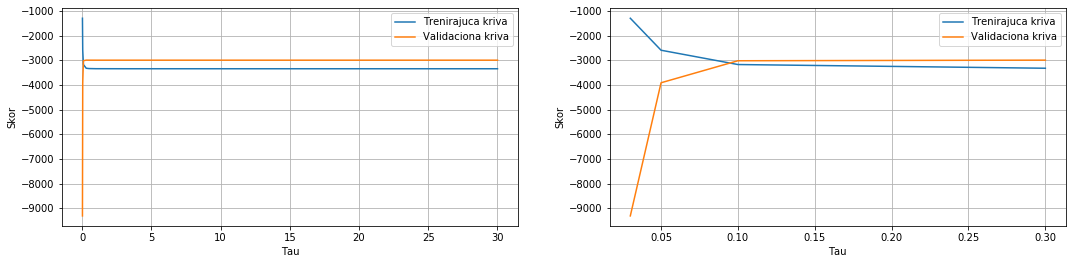

In [16]:
# Pravi se objekat klase Locally_Weighted 
model_w = Locally_Weighted()

# Lista vrednosti tau i dve prazne liste za dodavanje skorova na trening i validacionom skupu
taus = [0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10, 30]
score_train = []
score_val = []

for t in taus:
    model_w.weight_matrices(X_train, X_train, t)
    model_w.fit(X_train, y_train)
    
    pred_w_train = model_w.predict(X_train)
    score_train.append(-MSE_metric(pred_w_train, y_train))

    model_w.weight_matrices(X_train, X_val, t)
    model_w.fit(X_train, y_train)
    
    pred_w_val = model_w.predict(X_val)
    score_val.append(-MSE_metric(pred_w_val, y_val))
    
# Naci tau za koje je validaciona kriva maksimalna
max_val = max(score_val)
best_tau =  score_val.index(max_val)
print('Najbolje tau je: ', taus[best_tau])

# Plotovanje trenirajuce i validacione krive
plt.figure()
%matplotlib inline

plt.subplots(figsize=(18,4 ))
plt.subplot(1,2,1)
plt.plot(taus, score_train)
plt.plot(taus, score_val)
plt.xlabel('Tau')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

plt.subplot(1,2,2)
plt.plot(taus[0:4], score_train[0:4])
plt.plot(taus[0:4], score_val[0:4])
plt.xlabel('Tau')
plt.ylabel('Skor')
plt.grid()
plt.legend(['Trenirajuca kriva','Validaciona kriva'])

Slika iznad pokazuje kako parametar $\tau$ utice na skor. Ukoliko je njegova vrednost mala tada samo veoma bliska merenja imaju uticaj na jedno merenje, te se prava hipoteze moze provuci kroz skoro sva merenje tj. doci ce do preobucavanja. Sa druge strane, ako je vrednost parametra velika, tada i dosta (prostorno) daleka merenja uticu na dato merenje i dolazi do podobucavanja.
Ukoliko se tezinske matrice racunaju, trenira i radi predikcija nad trening skupom, onda se lepo primecuje da je za malo $\tau$ itekako prisutno preobucavanje, odnosno skor je veliki. Sa povecanjem vrednosti $\tau$ skor se smanjuje, dok se skor validacione krive povecava.


## Poredjenje rezultata svi linearnih regresija

In [17]:
# Rezultat obicne linearne regresije
score_lin = MSE_metric(pred, y_test)

# Rezultat polinomijalne linearne regresije za najbolji stepen
X_new_train = model_poly.make_poly(X_train, degrees[best_degree])
X_new_test = model_poly.make_poly(X_test, degrees[best_degree])

model_poly.fit(X_new_train, y_train)
pred_poly = model_poly.predict(X_new_test)

score_lin_poly = MSE_metric(pred_poly, y_test)

# Rezultat Ridge linearne regresije za najbolji stepen i lambdu
X_new_train = model_poly.make_poly(X_train, best_pair[0])
X_new_test = model_poly.make_poly(X_test, best_pair[0])

model_ridge.fit(X_new_train, y_train, lam = best_pair[1])
pred_ridge = model_ridge.predict(X_new_test)
                
score_lin_ridge = MSE_metric(pred_ridge, y_test)

# Rezultat Lasso linearne regresije za najbolji stepen i lambdu
X_new_train = model_poly.make_poly(X_train, best_pair_lasso[0])
X_new_test = model_poly.make_poly(X_test, best_pair_lasso[0])

model_lasso.fit(X_new_train, y_train, lam = best_pair_lasso[1])
pred_lasso = model_lasso.predict(X_new_test)
                
score_lin_lasso = MSE_metric(pred_lasso, y_test)

# Rezultat lokalno ponderisane linearne regresije za najbolje tau
model_w.weight_matrices(X_train, X_test, taus[best_tau])
model_w.fit(X_train, y_train)

pred_w = model_w.predict(X_test)
score_lin_lw = MSE_metric(pred_w, y_test)

In [19]:
# Pravljenje DataFrame-a zbog lepseg prikaza

columns = ['Linear', 'Best Polynomial', 'Best Ridge', 'Best LASSO', 'Best Locally Weighted']
data = [score_lin, score_lin_poly, score_lin_ridge, score_lin_lasso, score_lin_lw]
df = pd.DataFrame(data, columns)
df.head()

,0
Linear,2814.452194
Best Polynomial,2814.452194
Best Ridge,2797.221926
Best LASSO,2770.870721
Best Locally Weighted,2793.616994
